Exchange_Method
-------------------
Get the matrix's inverse with the exchange method:
$$
\begin{bmatrix}
4 &3  &-2 &1 \\
1 &-3 &0  &-1 \\
2 &1  &3  &-2 \\
2 &-2 &3  &-3
\end{bmatrix}
$$

In [1]:
import numpy as np
from sympy import Matrix, init_printing
init_printing()

To begin, we start our matrix and put some lists that help us to know what $x_{n}$ and $b_{n}$ we were working and in the future we will sort

In [2]:
A = np.zeros((4, 4))
A[0] = [4, 3, -2, 1]
A[1] = [1, -3, 0, -1]
A[2] = [2, 1, 3, -2]
A[3] = [2, -2, 3, -3]
fila = []
columna = []

We have a matrix of $n \times n$, so we are going to make the exchange method $n-1$ times after this, we will look at which are the latest $x_{n}$ and $b_{n}$ that we must exchange.

In [3]:
for iter in range(len(A) - 1):
  mayor = 0
  for fila_ in A:
    for elemento in fila_:
      if abs(mayor) < abs(elemento):
        mayor = elemento
  loc = np.where(A == mayor)
  fila.append(loc[0][0])
  columna.append(loc[1][0])

  for i in range(len(A)):
    if i != columna[iter]:
      A[fila[iter], i] = A[fila[iter], i] / (- mayor)

  for i in range(len(A)):
    k = A[i, columna[iter]]
    for j in range(len(A)):
      if j != columna[iter] and i != fila[iter]:
        A[i, j] += k * A[fila[iter], j]

  for i in range(len(A)):
    if i == fila[iter]:
      A[i, columna[iter]] = 1 / mayor
    else:
      A[i, columna[iter]] /= mayor
  print(f"Iteracion {iter+1}, pivote: {mayor:.3f}\n{A}\n")

Iteracion 1, pivote: 4.000
[[ 0.25 -0.75  0.5  -0.25]
 [ 0.25 -3.75  0.5  -1.25]
 [ 0.5  -0.5   4.   -2.5 ]
 [ 0.5  -3.5   4.   -3.5 ]]

Iteracion 2, pivote: 4.000
[[ 0.1875 -0.6875  0.125   0.0625]
 [ 0.1875 -3.6875  0.125  -0.9375]
 [-0.125   0.125   0.25    0.625 ]
 [ 0.     -3.      1.     -1.    ]]

Iteracion 3, pivote: -3.688
[[ 0.15254237  0.18644068  0.10169492  0.23728814]
 [ 0.05084746 -0.27118644  0.03389831 -0.25423729]
 [-0.11864407 -0.03389831  0.25423729  0.59322034]
 [-0.15254237  0.81355932  0.89830508 -0.23728814]]



Once we have made the process $n-1$ times (in this case three times), we identify the row and column that are not exchanged, and we make the method in this $x_{n}$ and $b_{n}$ like pivot no matter if is greater or no.

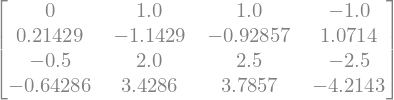

In [4]:
for i in range(len(A)):
  for j in range(len(A)):
    if i not in fila and j not in columna:
      mayor = A[i, j]

iter += 1

loc = np.where(A == mayor)
fila.append(loc[0][0])
columna.append(loc[1][0])

for i in range(len(A)):
  if i != columna[iter]:
    A[fila[iter], i] = A[fila[iter], i] / (- mayor)

for i in range(len(A)):
  k = A[i, columna[iter]]
  for j in range(len(A)):
    if j != columna[iter] and i != fila[iter]:
      A[i, j] += k * A[fila[iter], j]

for i in range(len(A)):
  if i == fila[iter]:
    A[i, columna[iter]] = 1 / mayor
  else:
    A[i, columna[iter]] /= mayor

T = Matrix(A)
T.evalf(5)

Finally, we change the order of the rows and columns to the initial order.

Matriz inverza


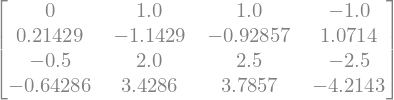

In [5]:
for i in range(len(A)):
  cambio = fila.index(i)
  A[[i, cambio]] = A[[cambio, i]]
  A[:, [i, cambio]] = A[:, [cambio, i]]

print("Matriz inverza")
T = Matrix(A)
T.evalf(5)